In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/all-bbls-eligibility_2024-06-24.csv').drop_duplicates()
gce_df = pd.read_csv('data/likely-gce-bbls_2024-06-24.csv').drop_duplicates()

In [3]:
df[['unitsres', 'rs_units']].describe()

,unitsres,rs_units
count,766617.000000,766617.000000
mean,4.810347,1.229195
std,35.737662,15.481830
min,1.000000,0.000000
25%,1.000000,0.000000
50%,2.000000,0.000000
75%,2.000000,0.000000
max,10914.000000,8770.000000


In [4]:
df['bldgclass'].value_counts(normalize=True)

bldgclass
A1    0.160462
A5    0.135897
B1    0.111462
B2    0.103676
C0    0.094378
        ...   
CM    0.000001
N1    0.000001
P3    0.000001
G6    0.000001
RI    0.000001
Name: proportion, Length: 154, dtype: float64

In [5]:
df['bldgclass'].nunique()

154

In [7]:
df['gce_likely'] = df['bbl'].isin(gce_df['bbl'])

In [8]:
df.head()

,bbl,address,borough,unitsres,yearbuilt,bldgclass,ownername,rs_units,is_nycha,eligible_year,eligible_bbl_units,eligible_bldgclass,eligible_rentstab,eligible_nycha,is_subsidized,gce_likely
0,2022630019,180 BROOK AVENUE,BX,1255,1956,D1,NYC HOUSING AUTHORITY,0,True,True,True,True,True,False,True,False
6,2031430155,2244 TIEBOUT AVENUE,BX,312,1931,D7,NYC HOUSING AUTHORITY,0,True,True,True,True,True,False,False,False
18,2035340001,2175 LACOMBE AVENUE,BX,583,1959,D1,NYC HOUSING AUTHORITY,0,True,True,True,True,True,False,True,False
22,2055640001,550 BALCOM AVENUE,BX,1020,1952,D3,NYC HOUSING AUTHORITY,0,True,True,True,True,True,False,True,False
58,3013730049,1521 STERLING PLACE,BK,31,1921,C1,NYC PACT PRESERVATION PARTNERS LLC,0,True,True,True,True,True,False,True,False


In [9]:
df['pct_rs'] = df['rs_units']/df['unitsres']

In [10]:
df.query("pct_rs < 1")['pct_rs'].describe()

count    747524.000000
mean          0.015284
std           0.104048
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           0.998569
Name: pct_rs, dtype: float64

In [12]:
(df['unitsres'] < 11).value_counts(normalize=True)

unitsres
True     0.951449
False    0.048551
Name: proportion, dtype: float64

In [13]:
(df['unitsres'] < 11).value_counts()

unitsres
True     729397
False     37220
Name: count, dtype: int64

In [14]:
for boro in df['borough'].unique():
    df_ = df.query('borough==@boro')
    print(boro.upper())
    print(df_['gce_likely'].value_counts())
    print(df_['gce_likely'].value_counts(normalize=True))

BX
gce_likely
False    74907
True       792
Name: count, dtype: int64
gce_likely
False    0.989538
True     0.010462
Name: proportion, dtype: float64
BK
gce_likely
False    247918
True       1431
Name: count, dtype: int64
gce_likely
False    0.994261
True     0.005739
Name: proportion, dtype: float64
MN
gce_likely
False    29325
True      3153
Name: count, dtype: int64
gce_likely
False    0.902919
True     0.097081
Name: proportion, dtype: float64
QN
gce_likely
False    296651
True        641
Name: count, dtype: int64
gce_likely
False    0.997844
True     0.002156
Name: proportion, dtype: float64
SI
gce_likely
False    111727
True         72
Name: count, dtype: int64
gce_likely
False    0.999356
True     0.000644
Name: proportion, dtype: float64


In [19]:
gce_df['borough'].value_counts()

borough
MN    3153
BK    1431
BX     792
QN     641
SI      72
Name: count, dtype: int64

In [20]:
gce_df['borough'].value_counts(normalize=True)

borough
MN    0.517819
BK    0.235014
BX    0.130071
QN    0.105272
SI    0.011825
Name: proportion, dtype: float64

<Axes: >

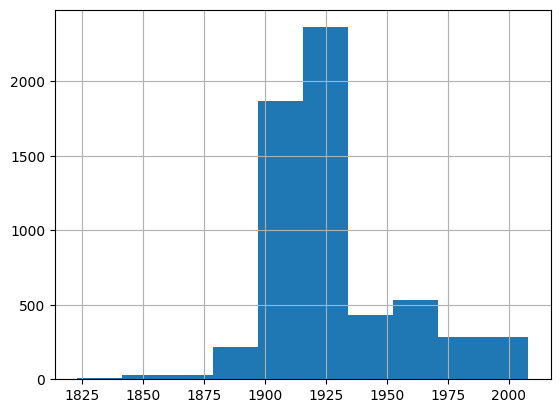

In [33]:
gce_df.query("yearbuilt > 1800")['yearbuilt'].hist()

<Axes: >

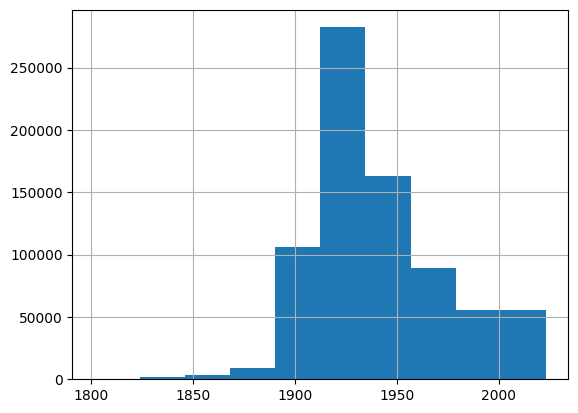

In [30]:
df.query("yearbuilt > 1800")['yearbuilt'].hist()

In [35]:
gce_df['gce_units'] = gce_df['unitsres'] - gce_df['rs_units']

In [36]:
gce_df['gce_units'].describe()

count    6089.000000
mean       49.231237
std        81.126192
min        11.000000
25%        16.000000
50%        24.000000
75%        49.000000
max      1887.000000
Name: gce_units, dtype: float64

In [37]:
gce_df['gce_units'].sum()

np.int64(299769)

In [38]:
gce_df.head()

,bbl,address,borough,unitsres,rs_units,yearbuilt,bldgclass,ownername,wow_link,latitude,longitude,gce_units
0,3051020063,2101 ALBEMARLE ROAD,BK,94,0,1939,D1,2101 ALBERMARLE INC,https://whoownswhat.justfix.org/bbl/3051020063,40.647685,-73.959027,94
1,3024310036,151 SOUTH 4 STREET,BK,25,0,1906,C6,149 SOUTH 4TH STREET HOUSING DEV,https://whoownswhat.justfix.org/bbl/3024310036,40.711812,-73.962064,25
2,1005830024,40 MORTON STREET,MN,15,0,1887,C4,"SKYJAM HOLDING, LLC",https://whoownswhat.justfix.org/bbl/1005830024,40.730644,-74.005142,15
3,1014990010,11 EAST 87 STREET,MN,85,0,1954,D4,11 EAST 87TH ST TENANTS CORP,https://whoownswhat.justfix.org/bbl/1014990010,40.781969,-73.958767,85
4,1005670007,33 5 AVENUE,MN,60,0,1923,D4,33 FIFTH AVE OWNERS,https://whoownswhat.justfix.org/bbl/1005670007,40.733172,-73.995280,60
